<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/pytorch_c%3Bassification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Clasification

In [1]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 100

X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [2]:
len(X), len(y)

(100, 100)

In [3]:
print(f'{X[:5]}')
print(f'{y[:5]}')

[[-0.40957228 -0.70266396]
 [ 0.75810247  0.33360948]
 [-0.64086599  0.48813954]
 [ 0.78212694 -0.59114489]
 [ 0.77303687 -0.71826406]]
[1 1 1 0 0]


In [4]:
#Make dataframe of circles data
import pandas as pd
circles =pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                      'label':y})

circles.head(10)

,X1,X2,label
0,-0.409572,-0.702664,1
1,0.758102,0.333609,1
2,-0.640866,0.488140,1
3,0.782127,-0.591145,0
4,0.773037,-0.718264,0
5,0.215881,-0.930492,0
6,-0.916040,0.317596,0
7,-0.637408,-0.472662,1
8,0.323051,0.973140,0
9,0.976609,-0.025317,0


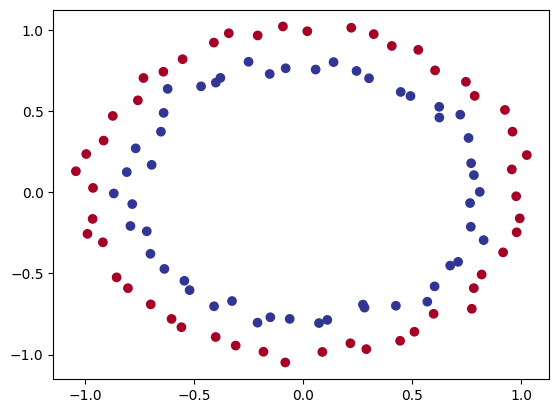

In [5]:
#Visualize , Visualize, Visaulize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [6]:
## check input and output shapes
X.shape, y.shape


((100, 2), (100,))

In [7]:
#view the first sample of feature and labels
X_sample = X[0]
y_sample = y[0]

print(f'values for one sample of x: {X_sample} and the same for y:{y_sample}')
print(f'shapes of one samples of X:{X_sample.shape}and the same for y:{y_sample.shape}')

values for one sample of x: [-0.40957228 -0.70266396] and the same for y:1
shapes of one samples of X:(2,)and the same for y:()


Turning data into tensor

In [8]:
#Turn data into tensor
import torch

# Convert X to tensor if it's not already one
if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X).type(torch.float)

# Convert y to tensor if it's not already one
if not isinstance(y, torch.Tensor):
    y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[-0.4096, -0.7027],
         [ 0.7581,  0.3336],
         [-0.6409,  0.4881],
         [ 0.7821, -0.5911],
         [ 0.7730, -0.7183]]),
 tensor([1., 1., 1., 0., 0.]))

In [9]:
type(X), X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [10]:
#split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [11]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [12]:
#2Building a model
import torch
from torch import nn

#construct a model that subclasses nn.module
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2.Create 2 nn.linear
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
#Define a forward method that outlines the forward pass
  def forward(self, X):
    return self.layer_2(self.layer_1(X))

    #instanciate an instance of our model class and send it to the target device

# Get CPU, GPU or MPS device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

model_0 = circleModelV0().to(device)
model_0

Using cpu device


circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
next(model_0.parameters()).device

device(type='cpu')

In [15]:
## lets replicate the model above using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

)

In [17]:
#Make some predictions
with torch.inference_mode():
  untrained_preds =model_0(X_test.to(device))

print(f'Length of predictions: {len(untrained_preds)}, shape:{untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape:{X_test.shape}')
print(f'First 10 predictions {untrained_preds[:10]}')
print(f'First 10 test labels {y_test[:10]}')

Length of predictions: 20, shape:torch.Size([20, 1])
Length of test samples: 20, Shape:torch.Size([20, 2])
First 10 predictions tensor([[-0.8460],
        [-1.0759],
        [-0.7621],
        [-0.1655],
        [-0.7014],
        [-0.0372],
        [-0.6500],
        [-0.1164],
        [-0.1420],
        [-0.9331]])
First 10 test labels tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.])


In [20]:
##Setting up a loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1 )

In [21]:
#calculate the accuracy of 100 examples what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc =correct/len(y_pred)*100
  return acc

In [23]:
##view thr first 5 output of the forward pass on the test data
with torch.inference_mode():

 y_logits = model_0(X_test.to(device)[:5])
y_logits


tensor([[-0.8460],
        [-1.0759],
        [-0.7621],
        [-0.1655],
        [-0.7014]])

In [25]:
#use a sigmiod activation function to turn them into predcition probabilities

y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.3003],
        [0.2543],
        [0.3182],
        [0.4587],
        [0.3315]])

In [28]:
#find the predicted lables
y_preds = torch.round(y_preds_probs)

#in full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

#Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [29]:
y_test[:5]

tensor([0., 0., 1., 0., 0.])

In [45]:
#Building a Trainig loop and testing optimization loop
torch.manual_seed(42)
#set the number of epochs
epochs = 100

#put data to target device
X_train, y_train =X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Building training and evaluation loop
for epoch in range (epochs):
  #Training
  model_0.train()

  #froward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

 #Calculate the loss/accuracy
  loss = loss_fn(y_logits,
                  y_train)
  acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
  #optimizer zero grad
  optimizer.zero_grad()

  #loss backward
  loss.backward()

  #optimizers step
  optimizer.step()

  ##Testing
  model_0.eval()
  with torch.inference_mode():

    #forward pass
    test_logits =model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #Calculate the loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


    #print out what is happeining
    if epoch % 10 == 0:
      print(f'Epoch:{epoch} | loss:{loss:.5f}, Acc:{acc:.2f}% | test loss{test_loss:.5f},test acc:{test_acc:2f}%')


Epoch:0 | loss:0.68805, Acc:55.00% | test loss0.74791,test acc:30.000000%
Epoch:10 | loss:0.68799, Acc:55.00% | test loss0.74747,test acc:30.000000%
Epoch:20 | loss:0.68795, Acc:55.00% | test loss0.74704,test acc:30.000000%
Epoch:30 | loss:0.68791, Acc:55.00% | test loss0.74664,test acc:30.000000%
Epoch:40 | loss:0.68788, Acc:55.00% | test loss0.74628,test acc:30.000000%
Epoch:50 | loss:0.68786, Acc:55.00% | test loss0.74594,test acc:30.000000%
Epoch:60 | loss:0.68784, Acc:55.00% | test loss0.74564,test acc:30.000000%
Epoch:70 | loss:0.68782, Acc:55.00% | test loss0.74538,test acc:30.000000%
Epoch:80 | loss:0.68781, Acc:55.00% | test loss0.74514,test acc:30.000000%
Epoch:90 | loss:0.68780, Acc:55.00% | test loss0.74492,test acc:30.000000%


In [ ]:
## make prediction and evaluate the model
